In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [3]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
df.duplicated().sum()

0

In [5]:
df['ListingKey'].isnull().sum()

0

since i am dealing with a large data set and i want to simplify it i pick columns that are interestin to me personally and useful in visualisation and drop the null values

In [6]:
selected_columns = ['ListingKey', 'ListingNumber', 'ListingCreationDate','Term', 
                   'LoanStatus', 'BorrowerAPR', 'BorrowerRate','LenderYield','EstimatedLoss',
                   'EstimatedReturn','ListingCategory (numeric)', 'BorrowerState','Occupation', 
                   'EmploymentStatus', 'EmploymentStatusDuration','IsBorrowerHomeowner' ,'LoanOriginalAmount',
                   'LoanOriginationDate', 'LoanOriginationQuarter','MonthlyLoanPayment','Recommendations',
                    'Investors', 'DebtToIncomeRatio','StatedMonthlyIncome', 'IncomeRange',  ]

In [7]:
#created a new dataframe from the list created above this was used to simplify the data for easy visualisation
loans_df = df[selected_columns]
loans_df.shape

(113937, 25)

In [8]:
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,...,IsBorrowerHomeowner,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,Investors,DebtToIncomeRatio,StatedMonthlyIncome,IncomeRange
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,...,True,9425,2007-09-12 00:00:00,Q3 2007,330.43,0,258,0.17,3083.333333,"$25,000-49,999"
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,0.0249,0.05470,...,False,10000,2014-03-03 00:00:00,Q1 2014,318.93,0,1,0.18,6125.000000,"$50,000-74,999"
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,...,False,3001,2007-01-17 00:00:00,Q1 2007,123.32,0,41,0.06,2083.333333,Not displayed
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,0.0249,0.06000,...,True,10000,2012-11-01 00:00:00,Q4 2012,321.45,0,158,0.15,2875.000000,"$25,000-49,999"
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,0.0925,0.09066,...,True,15000,2013-09-20 00:00:00,Q3 2013,563.97,0,20,0.26,9583.333333,"$100,000+"


In [9]:
loans_df.isnull().sum().sum()

85730

In [10]:
#checking the datatypes of all columns
loans_df.dtypes

ListingKey                    object
ListingNumber                  int64
ListingCreationDate           object
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
EstimatedLoss                float64
EstimatedReturn              float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
LoanOriginalAmount             int64
LoanOriginationDate           object
LoanOriginationQuarter        object
MonthlyLoanPayment           float64
Recommendations                int64
Investors                      int64
DebtToIncomeRatio            float64
StatedMonthlyIncome          float64
IncomeRange                   object
dtype: object

In [11]:
loans_df['Recommendations'].unique()

array([ 0,  2,  1,  4,  3,  9,  5, 16, 39, 21,  7, 14,  8,  6, 24, 19, 18],
      dtype=int64)

### What is/are the main feature(s) of interest in your dataset?
i want to know waht type of people default loans.
And the correlation among some series

In [12]:
#removing all the null values from the dataframe
loans_df = loans_df.dropna()
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,...,IsBorrowerHomeowner,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,Investors,DebtToIncomeRatio,StatedMonthlyIncome,IncomeRange
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,0.0249,0.05470,...,False,10000,2014-03-03 00:00:00,Q1 2014,318.93,0,1,0.18,6125.000000,"$50,000-74,999"
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,0.0249,0.06000,...,True,10000,2012-11-01 00:00:00,Q4 2012,321.45,0,158,0.15,2875.000000,"$25,000-49,999"
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,0.0925,0.09066,...,True,15000,2013-09-20 00:00:00,Q3 2013,563.97,0,20,0.26,9583.333333,"$100,000+"
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,60,Current,0.15425,0.1314,0.1214,0.0449,0.07077,...,True,15000,2013-12-24 00:00:00,Q4 2013,342.37,0,1,0.36,8333.333333,"$100,000+"
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,36,Current,0.31032,0.2712,0.2612,0.1275,0.11070,...,False,3000,2013-04-18 00:00:00,Q2 2013,122.67,0,1,0.27,2083.333333,"$25,000-49,999"


In [13]:
#to confirm if the null values where removed

loans_df.isnull().sum()

ListingKey                   0
ListingNumber                0
ListingCreationDate          0
Term                         0
LoanStatus                   0
BorrowerAPR                  0
BorrowerRate                 0
LenderYield                  0
EstimatedLoss                0
EstimatedReturn              0
ListingCategory (numeric)    0
BorrowerState                0
Occupation                   0
EmploymentStatus             0
EmploymentStatusDuration     0
IsBorrowerHomeowner          0
LoanOriginalAmount           0
LoanOriginationDate          0
LoanOriginationQuarter       0
MonthlyLoanPayment           0
Recommendations              0
Investors                    0
DebtToIncomeRatio            0
StatedMonthlyIncome          0
IncomeRange                  0
dtype: int64

In [14]:
loans_df['Term'].unique()

array([36, 60, 12], dtype=int64)

In [15]:
loans_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,ListingCategory (numeric),EmploymentStatusDuration,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,Investors,DebtToIncomeRatio,StatedMonthlyIncome
count,7.621600e+04,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,7.737463e+05,42.760470,0.223901,0.193621,0.183616,0.078611,0.095528,3.302259,104.578028,9294.999410,296.421859,0.016571,69.998517,0.258032,6002.833586
std,2.344166e+05,11.744005,0.079372,0.074088,0.074088,0.046047,0.030031,4.396670,95.836443,6413.404265,189.674943,0.187732,97.801415,0.320587,5110.743506
min,4.162750e+05,12.000000,0.045830,0.040000,0.030000,0.004900,-0.181600,0.000000,0.000000,1000.000000,0.000000,0.000000,1.000000,0.000000,0.250000
25%,5.603650e+05,36.000000,0.161570,0.134900,0.124900,0.042000,0.074080,1.000000,32.000000,4000.000000,159.062500,0.000000,1.000000,0.150000,3583.333333
50%,7.425500e+05,36.000000,0.215660,0.184500,0.174500,0.069900,0.091100,1.000000,76.000000,8000.000000,257.760000,0.000000,32.000000,0.220000,5041.666667
75%,9.747142e+05,60.000000,0.287800,0.254900,0.244900,0.108000,0.115000,3.000000,150.000000,14603.250000,392.420000,0.000000,100.000000,0.320000,7250.000000
max,1.255149e+06,60.000000,0.423950,0.360000,0.340000,0.366000,0.266700,20.000000,755.000000,35000.000000,2251.510000,19.000000,1189.000000,10.010000,483333.333333


now we are done with data wrnging phase 
we move to the visuaisation aspect


In [16]:
base_color = sb.color_palette()[0]

## How many loan applicants own a house




We can say that most people that come for loans are house owners


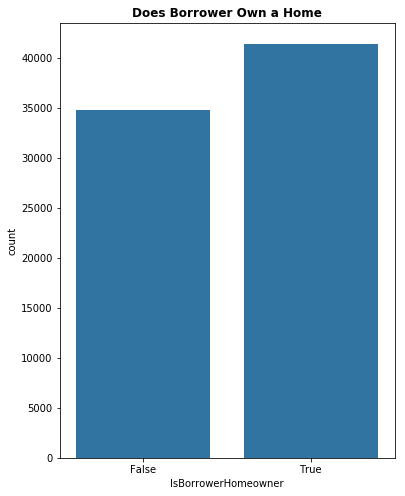

In [17]:
#plotting a countplot to show the variation of lenders and their house owing status
plt.figure(figsize = [6, 8])
plt.title('Does Borrower Own a Home', fontweight="bold")
print('We can say that most people that come for loans are house owners')
sb.countplot(data=loans_df, x='IsBorrowerHomeowner', color = base_color);

#### What percentage of Applicants defaulted payment

In [18]:
loans_df['did_they_default'] = pd.get_dummies(df['LoanStatus']) ['Defaulted']
loans_df['did_they_default'].value_counts(normalize=True) * 100

0    98.838826
1     1.161174
Name: did_they_default, dtype: float64

1.16% of applicants dfaulted payment 

And we notice that it mostunlikely for someone to default loan payment

In [19]:
#getting an insight into the loansatus data
loans_df['LoanStatus'].value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

In [20]:
defaulters = loans_df[loans_df['LoanStatus'] == 'Defaulted']
defaulters.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedLoss,EstimatedReturn,...,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Recommendations,Investors,DebtToIncomeRatio,StatedMonthlyIncome,IncomeRange,did_they_default
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,36,Defaulted,0.35797,0.3177,0.3077,0.1650,0.1246,...,4000,2012-04-19 00:00:00,Q2 2012,173.71,0,10,0.49,5500.000000,"$50,000-74,999",1
23,101B35764008108187B2EBA,758964,2013-04-22 13:29:19.073000000,36,Defaulted,0.28032,0.2419,0.2319,0.1075,0.1051,...,2000,2013-04-26 00:00:00,Q2 2013,78.67,0,30,0.39,2500.000000,"$25,000-49,999",1
107,10BE354254173728633D033,573446,2012-03-29 12:17:10.017000000,36,Defaulted,0.35797,0.3177,0.3077,0.1650,0.1246,...,4000,2012-04-23 00:00:00,Q2 2012,173.71,0,13,0.54,2833.333333,"$25,000-49,999",1
138,11273541569159931E84F17,569000,2012-03-16 09:22:33.393000000,36,Defaulted,0.33973,0.2999,0.2899,0.1490,0.1276,...,3000,2012-03-21 00:00:00,Q1 2012,127.34,0,31,0.35,3750.000000,"$25,000-49,999",1
179,0F1E35343868130956BD68F,544844,2011-12-16 03:50:25.970000000,36,Defaulted,0.34731,0.3073,0.2973,0.1490,0.1347,...,5500,2011-12-20 00:00:00,Q4 2011,235.69,0,45,0.13,4583.333333,"$50,000-74,999",1


### Which state had the most loan defaultment?

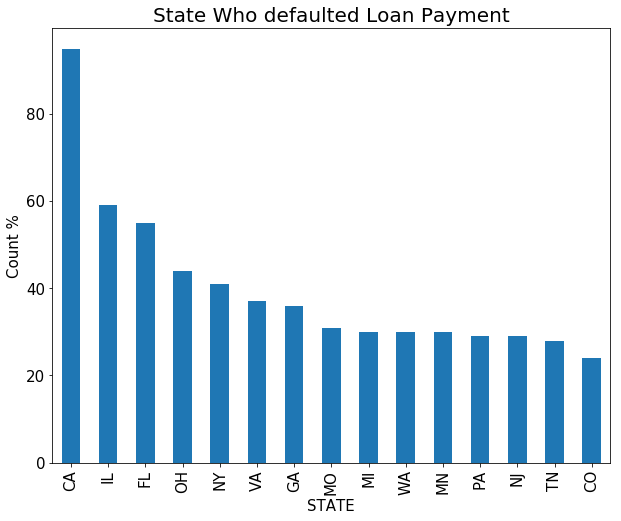

In [21]:
#state of borrowers who deafulted loan payment ploting only the top 15

defaulters['BorrowerState'].value_counts()[:15].plot.bar(figsize=(10,8), fontsize = 15.0, color = base_color)
plt.title('State Who defaulted Loan Payment', fontsize = 20.0)
plt.ylabel('Count %', fontsize = 15.0)
plt.xlabel('STATE', fontsize = 15.0);

In [22]:
#a state dataframe was created that consisted of state and the percentage of defaulters 
state = list(defaulters['BorrowerState'].unique())
percentage_defauters = []
for i in state:
    loanee = loans_df[loans_df['BorrowerState'] == i].shape[0]
    defaulter = defaulters[defaulters['BorrowerState'] == i].shape[0]
    percentage = (defaulter/loanee) * 100
    percentage_defauters.append(percentage)
    


series = pd.Series(data = percentage_defauters, index = state)
state_df = pd.DataFrame({'state':series.index, 'percentage_of_defaulters':series.values})
state_df.sort_values(by=['percentage_of_defaulters'], inplace=True, ascending=False)
state_df

,state,percentage_of_defaulters
33,SD,3.636364
8,RI,3.457447
22,NM,2.730375
21,TN,2.005731
5,MO,1.949686
4,MN,1.930502
31,MS,1.833333
6,KS,1.677419
15,CO,1.559454
20,WA,1.558442


### Which state is most likely to default payment?

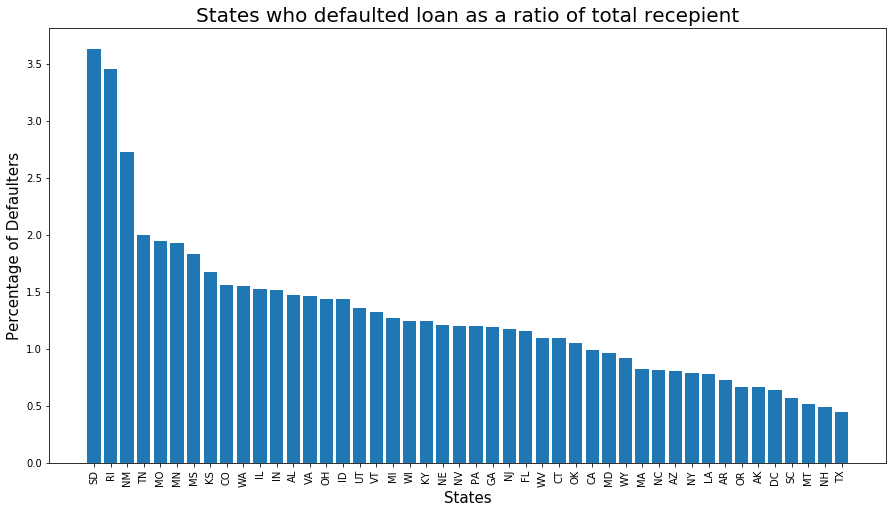

In [23]:
plt.figure(figsize = (15,8))
plt.bar(state_df['state'], state_df['percentage_of_defaulters'] )
plt.xticks(rotation = 90)
plt.title('States who defaulted loan as a ratio of total recepient', fontsize = 20.0)
plt.xlabel('States', fontsize = 15.0)
plt.ylabel('Percentage of Defaulters', fontsize = 15.0);

### New insight

Compared to what was discovered previously from the 'State Who defaulted Loan Payment' graph. where 'CA' had the highest value of defaulters but this was only due to their high number of loan recepients. A new plot was done based on the ratio of deafuters to the ratio of loan recepients. This showed that although CA was very hgh it was not likely for a loan recepient  in CA to deafult as they had a ratio less than 1

Although states SD and RI were not in the first plot(ie top 10 in number of defaulters) their loan receipients were the most likely to default with a ratio above 3 for both

In [24]:
#insight into the occupations column of the defaulters dataframe

defaulters['Occupation'].value_counts()

Other                                240
Professional                         109
Administrative Assistant              57
Clerical                              39
Retail Management                     31
Teacher                               28
Skilled Labor                         25
Computer Programmer                   24
Nurse (RN)                            24
Accountant/CPA                        22
Laborer                               21
Construction                          20
Sales - Commission                    18
Analyst                               18
Executive                             16
Sales - Retail                        15
Civil Service                         14
Military Enlisted                     13
Police Officer/Correction Officer     12
Truck Driver                          12
Food Service Management               10
Food Service                           9
Medical Technician                     9
Postal Service                         7
Social Worker   

### What occupation defaulted payment the most?

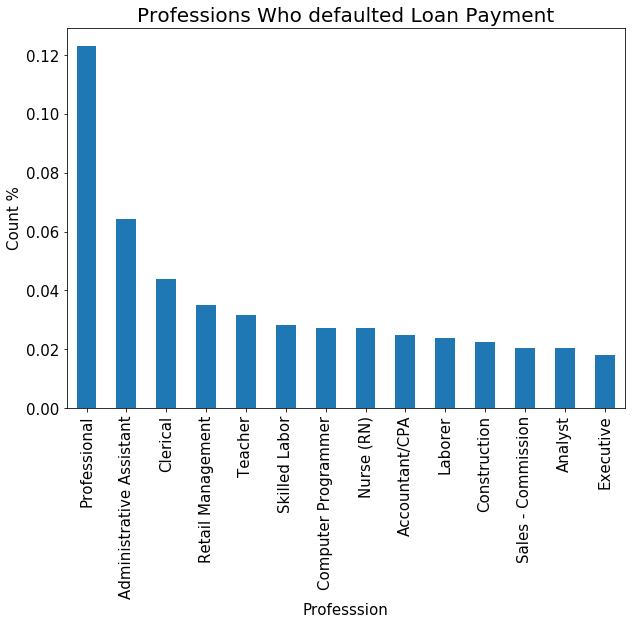

In [25]:
#we graded occupations of deafulters and excused the one termed 'others' as this contains a wide variation
#and might have effect on our analysis. ploting only the top 15

defaulters['Occupation'].value_counts(normalize = True)[1:15].plot.bar(figsize=(10,7), fontsize = 15.0, color = base_color)
plt.title('Professions Who defaulted Loan Payment', fontsize = 20.0)
plt.ylabel('Count %', fontsize = 15.0)
plt.xlabel('Professsion', fontsize = 15.0);

From the earlier graph we can say professional had the highest number of defaulters.

### The variation between the amount loaned amount to defaulters in comparison to the general recepients of loan

### How is the Amount loaned out spread out? For this we don't consider any value as an outlier as it will have an effect on our analysis and story telling.

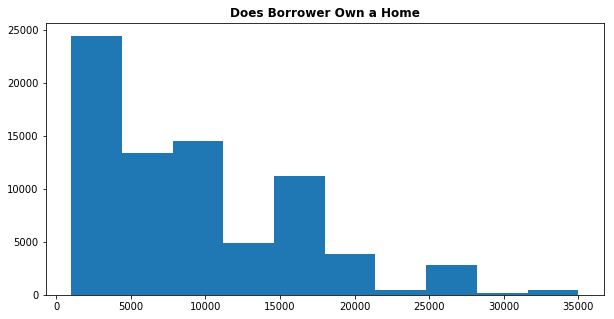

In [26]:
plt.figure(figsize = [10, 5])
plt.title('Does Borrower Own a Home', fontweight="bold")
plt.hist(loans_df['LoanOriginalAmount']);

From the above diagram we can say that the average and mode of amount loaned out is in the lower boundary(i.e below the median value). There are also values at the far right which act like outliers but are considered to show that the amount loaned out has a wide range

### What values have an effect on the amount loaned? How does the various numeric value correlate with one another.

##### The variables are : 'StatedMonthlyIncome', 'Recommendations', 'EmploymentStatusDuration', 'BorrowerRate', 'EstimatedReturn', 'DebtToIncomeRatio'

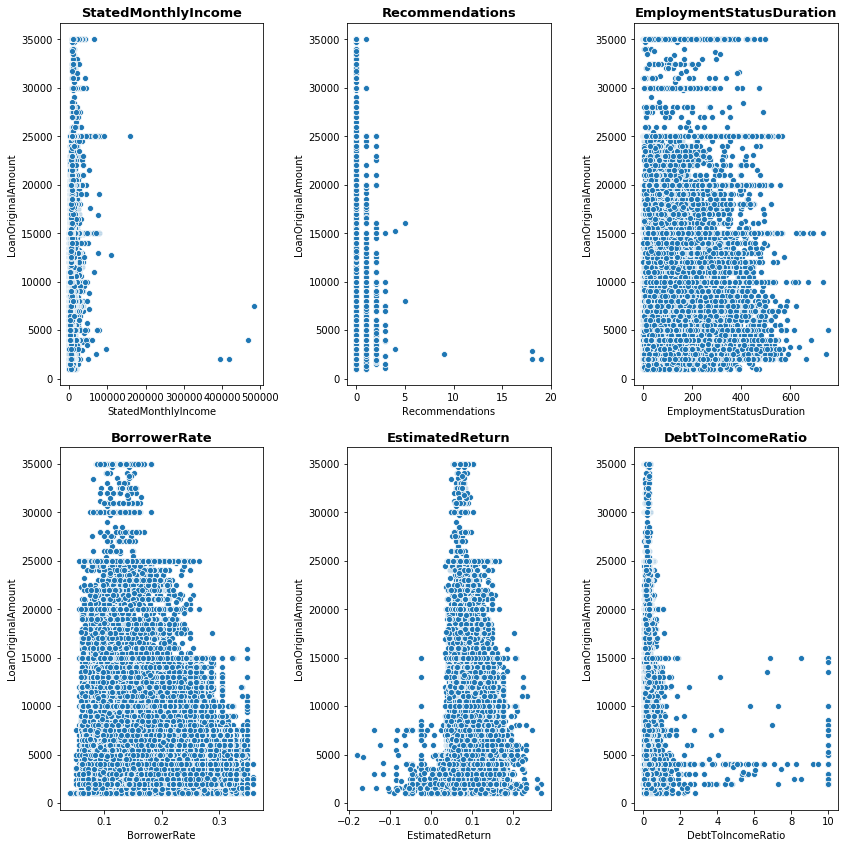

In [27]:
#created a list of variables that should have effect on amount loaned. their correlation was inspected 
comparator = ['StatedMonthlyIncome', 'Recommendations', 'EmploymentStatusDuration', 'BorrowerRate', 'EstimatedReturn', 'DebtToIncomeRatio'] 
figu = plt.figure(figsize = [12, 12])
j=1

for item in comparator:
    plt.subplot(int(str(23)+str(j)))
    sb.scatterplot(data = loans_df, x= item , y= 'LoanOriginalAmount' )
    plt.title(item, fontweight="bold", fontsize = 13.0)
    j+=1
    
figu.tight_layout(pad= 1.5);

In [28]:
#a list of numerical values was used to compare their correlation with each other
values = ['StatedMonthlyIncome', 'Recommendations', 'EmploymentStatusDuration', 'EstimatedReturn', 'Term', 'LoanOriginalAmount','BorrowerRate', 'DebtToIncomeRatio'] 

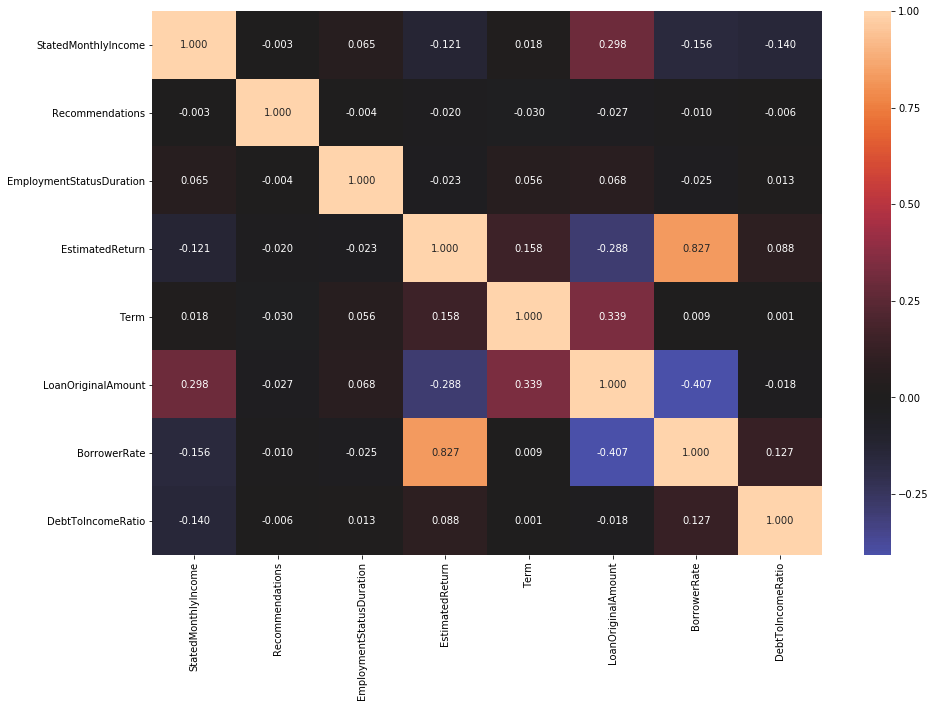

In [29]:
plt.figure(figsize = [15, 10])
sb.heatmap(loans_df[values].corr(), annot = True, fmt = '.3f',
            center = 0)
plt.show()

As we saw from the first scatterplot and also the heatmap there is very little correlation among the numerical values and the amount borrowed. That is the amount borrowed is not dependent on the fore mentioned variables.

from the heat map above we can say estimated retun and borrowed rate have the highest correlation as we can say the return depends solely on the rate set on the loaned amount

Also borrowed rate has a  negative correlation with loan amount. this means the higher the loaned amount the lesser the borrower rate set.



### Variation of amount loaned out across various income ranges.

C:\Users\IBRAHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


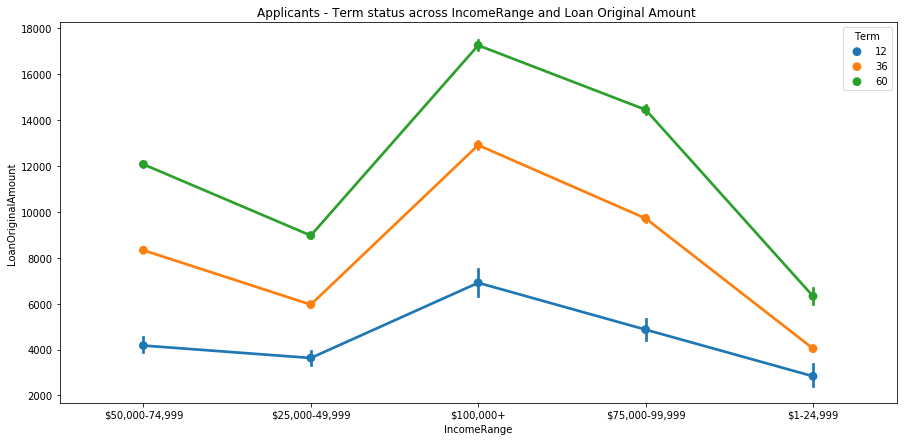

In [30]:
plt.figure(figsize = [15, 7])
sb.pointplot(data = loans_df[loans_df['EmploymentStatus']=='Employed'], x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term');
plt.title('Applicants - Term status across IncomeRange and Loan Original Amount ');

we can notice a positive correlation/ relation between income range and loan original Amount. 
People with the highest income borrowed the highest amount of money and those within the lowest range borrowed the lowest

### What was majority of the loan used for?

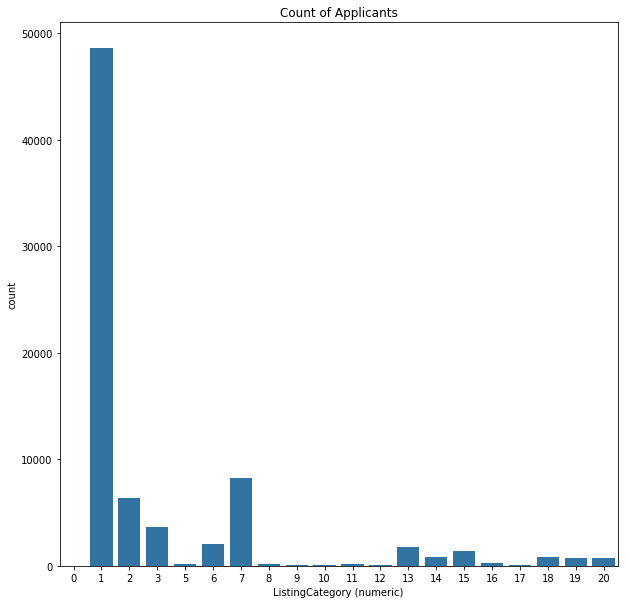

In [31]:
plt.figure(figsize = [10, 10])
sb.countplot(data = loans_df, x = 'ListingCategory (numeric)', color = base_color)
plt.title('Count of Applicants');

#### The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


With that explained, Debt consolidation had the highest purpose of loan followed by others and to complete the top 3 was home improvement

### How much loan did each different loan status collect. Whats the variation of some cateories across all the loan status

C:\Users\IBRAHIM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


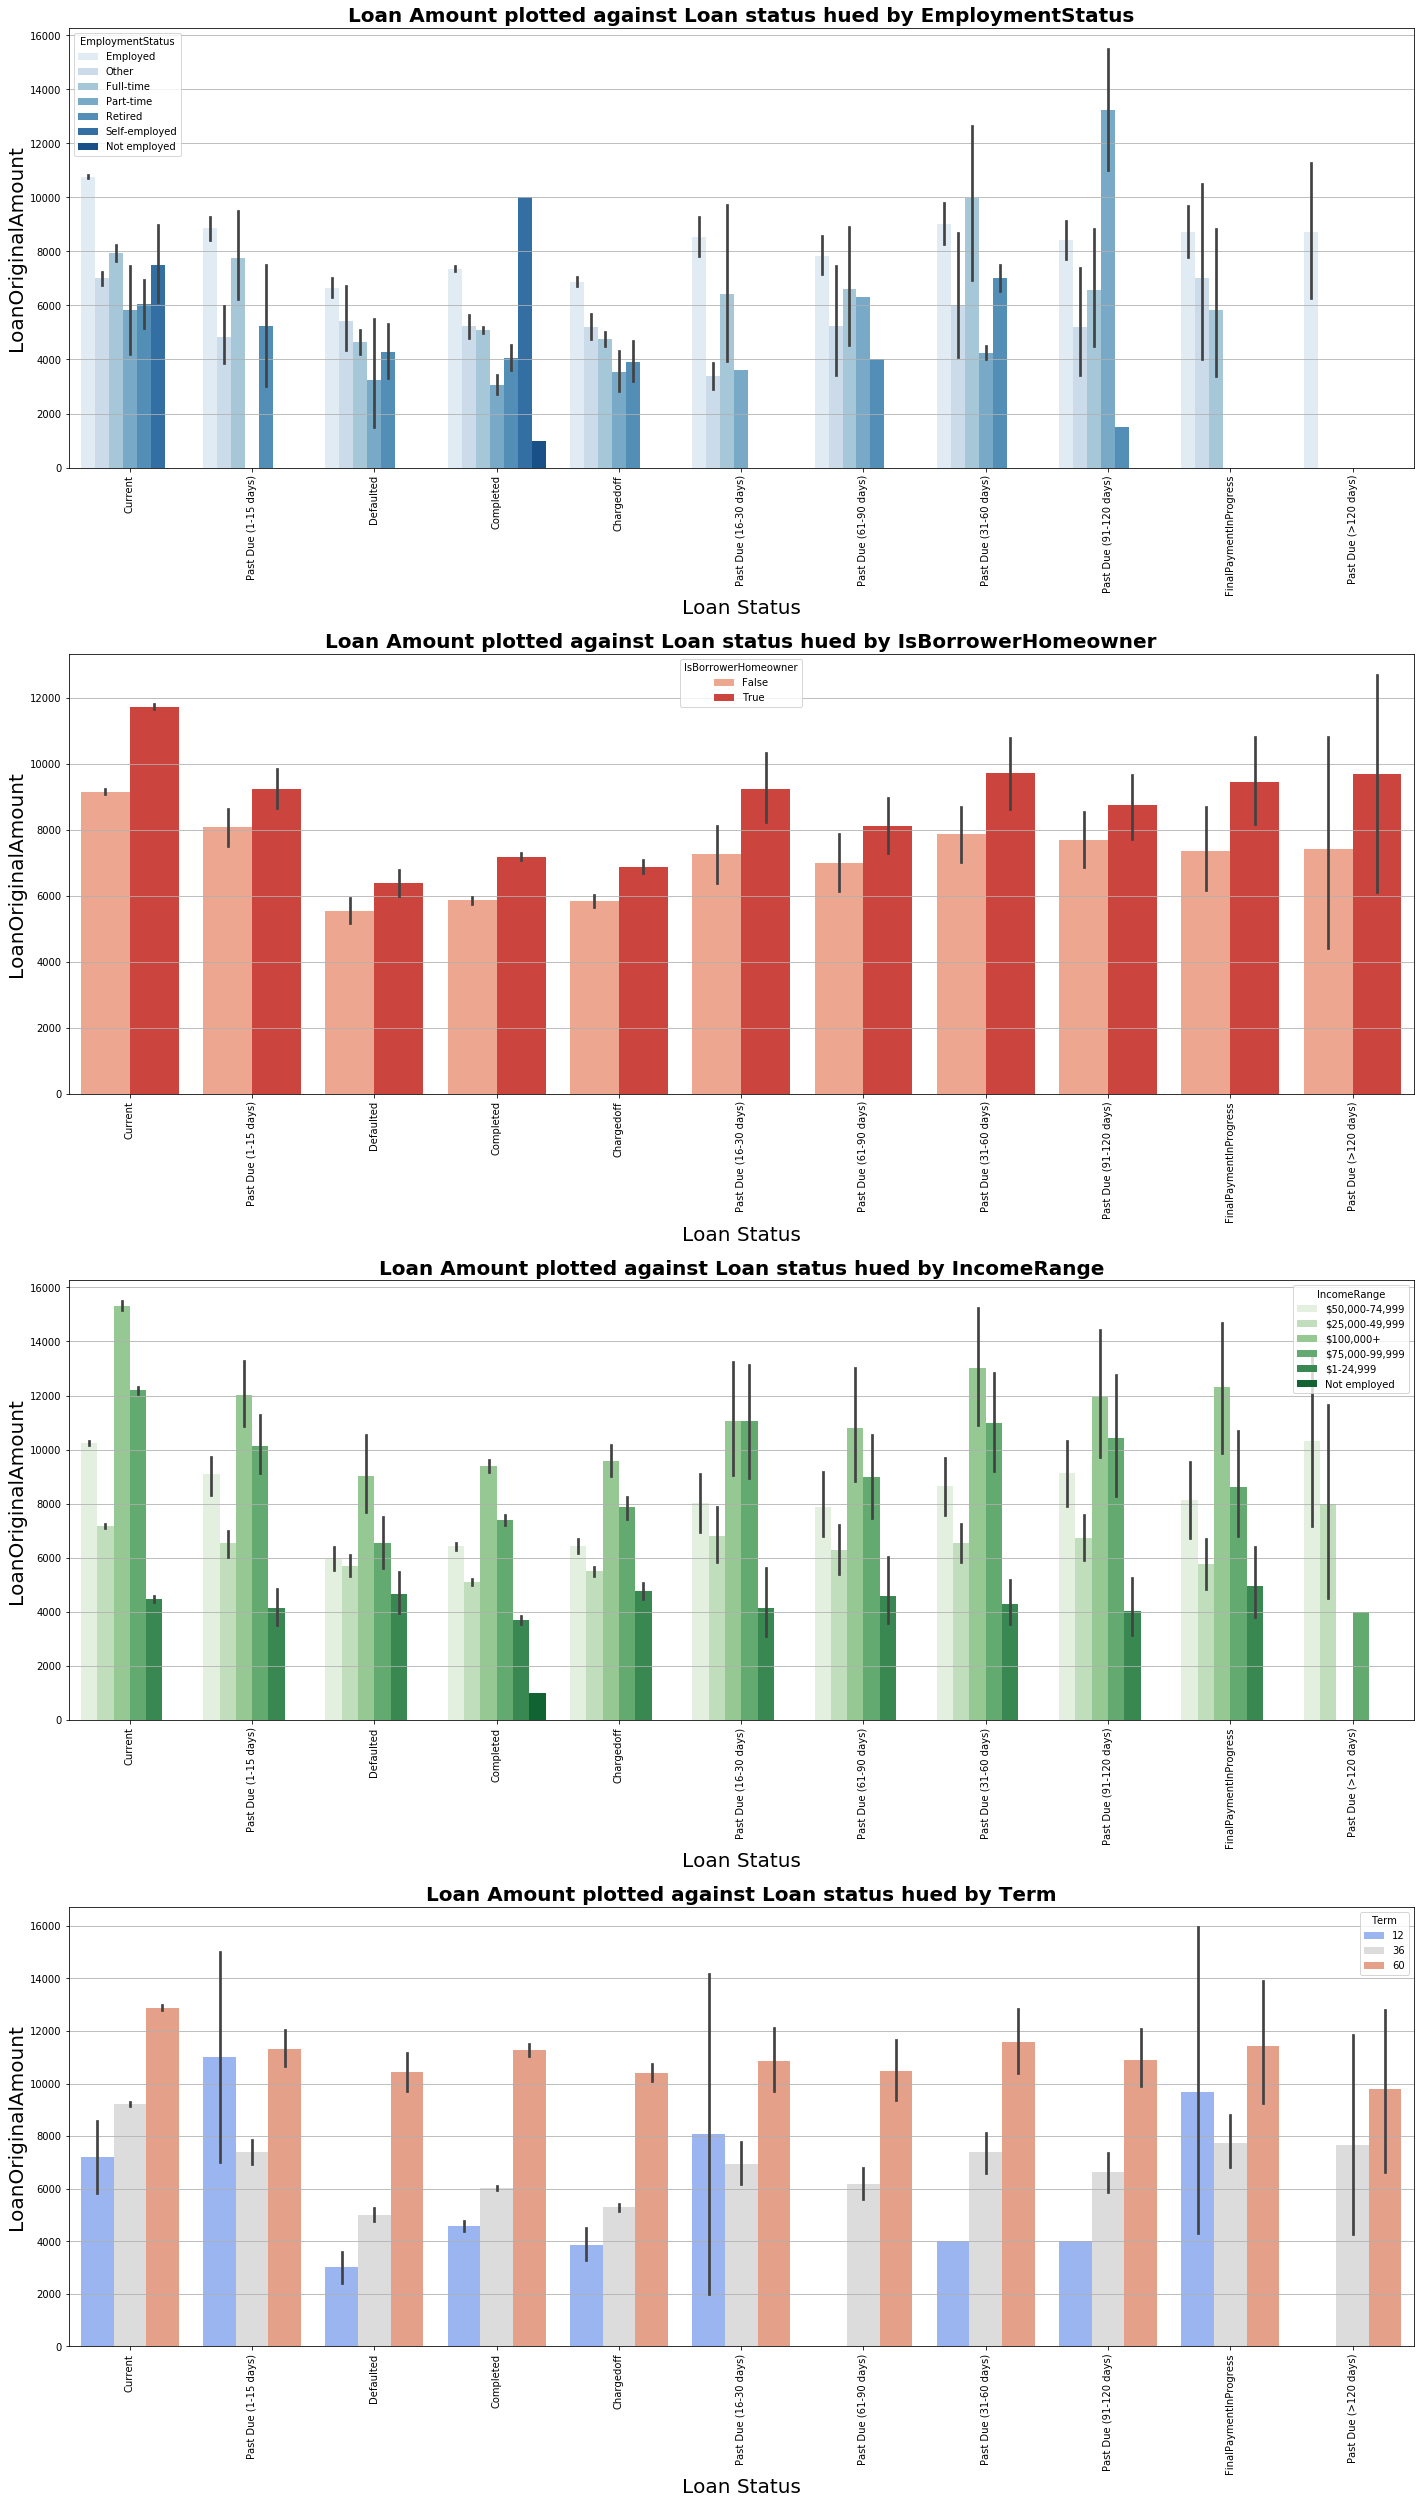

In [32]:
categoric_vars = ['EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'Term']
palette =['Blues', 'Reds', 'Greens','coolwarm']
figure = plt.figure(figsize = [20, 35])
i=1

for category in categoric_vars:
    plt.subplot(int(str(41)+str(i)))
    sb.barplot(data = loans_df, x = 'LoanStatus', y='LoanOriginalAmount', hue = category, palette = palette[i-1])
    plt.title('Loan Amount plotted against Loan status hued by {}'.format(category), fontweight="bold", fontsize = 20.0)
    plt.grid(axis = 'y')
    plt.xlabel('Loan Status',fontsize = 20)
    plt.ylabel('LoanOriginalAmount',fontsize = 20)
    plt.xticks(rotation = 90)
    i+=1
    
figure.tight_layout(pad= 1.5);